In [1]:

import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)  # y加上一个噪声
    return X, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

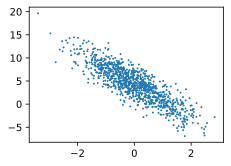

In [3]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [5]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.5157,  0.0675],
        [-0.1567, -1.5091],
        [-0.5841,  1.6182],
        [-0.0304,  0.0186],
        [ 0.2009, -0.9234],
        [ 2.6047,  1.8203],
        [ 0.5701,  0.2686],
        [-0.2560, -1.2884],
        [ 0.9308,  2.0916],
        [-0.4994,  0.2216]]) 
 tensor([[ 2.9565],
        [ 9.0110],
        [-2.4712],
        [ 4.0838],
        [ 7.7502],
        [ 3.2201],
        [ 4.4316],
        [ 8.0660],
        [-1.0753],
        [ 2.4208]])


In [11]:
w = torch.zeros(size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [12]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2


def SGD(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [13]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        SGD([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch: {epoch + 1}, loss: {float(train_l.mean()):f}')

epoch: 1, loss: 0.039740
epoch: 2, loss: 0.000147
epoch: 3, loss: 0.000051


In [14]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 6.1750e-05, -7.1526e-07], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0005], grad_fn=<RsubBackward1>)
